In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
np.random.seed(1000)
n = 50
m = 100
A = np.random.randn(m,n)
b = np.random.randn(m)
c = np.random.randn(n)

In [3]:
def loss(xy):
    x, y = xy[:n], xy[n:]
    conic_residual = np.minimum(y, 0.)
    dual_residual = A.T @ y + c
    primal_residual = np.minimum(-A @ x + b, 0.)
    gap = c.T @ x + b.T @ y
    
    return (
        np.linalg.norm(conic_residual)**2
        + np.linalg.norm(dual_residual)**2
        + np.linalg.norm(primal_residual)**2
        + gap**2
    )

xy = np.random.randn(n+m)
loss(xy)

8810.041932672124

In [4]:
import scipy.optimize as opt

np.random.seed(0)
xy0 = np.random.randn(n+m)

result = opt.minimize(loss, xy0)
print(result)

x, y = result['x'][:n], result['x'][n:]

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 1.8929100351922702e-07
        x: [-3.919e-01  3.842e-01 ... -3.830e-05 -6.070e-05]
      nit: 936
      jac: [-6.408e-07  4.975e-06 ... -1.437e-06  1.735e-07]
 hess_inv: [[ 5.745e-02 -8.894e-03 ...  2.254e-03  4.137e-03]
            [-8.894e-03  1.834e-01 ... -2.414e-03  4.526e-03]
            ...
            [ 2.254e-03 -2.414e-03 ...  4.188e-01  2.647e-02]
            [ 4.137e-03  4.526e-03 ...  2.647e-02  4.698e-01]]
     nfev: 207939
     njev: 1377


## Feasible

ORTHOGONALITY ERROR	 3.77e-04
DUAL RESIDUAL NORM	 6.14e-05
CONIC RESIDUAL NORM	 4.25e-04
SLACKS RESIDUAL NORM	 6.90e-05
GAP			 8.92e-06


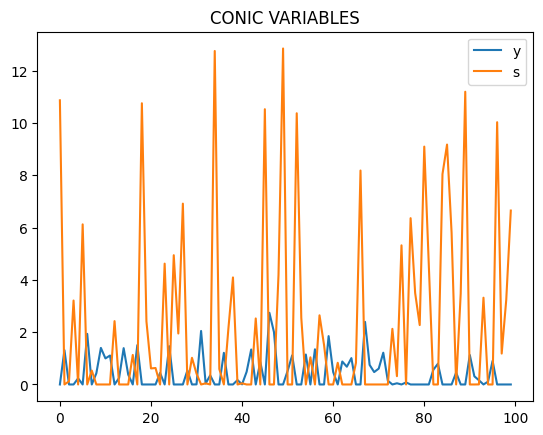

In [5]:
s = b - A @ x
plt.plot(y, label='y')
plt.plot(s, label='s')
plt.legend()
plt.title('CONIC VARIABLES')
print(f'ORTHOGONALITY ERROR\t {y.T @ s:.2e}')
print(f'DUAL RESIDUAL NORM\t {np.linalg.norm(A.T @ y + c):.2e}')
print(f'CONIC RESIDUAL NORM\t {np.linalg.norm(np.minimum(y,0.)):.2e}')
print(f'SLACKS RESIDUAL NORM\t {np.linalg.norm(np.minimum(s,0.)):.2e}')
print(f'GAP\t\t\t {(c.T @ x + b.T @ y):.2e}')

## Infeasibile

In [6]:
my_y = -np.minimum(-A @ x + b, 0.)
print(f'error norm {np.linalg.norm(A.T @ my_y):.2e}')
print(f'certificate {b.T @ my_y:.2e}')

error norm 7.69e-05
certificate 4.48e-05


## Unbounded

In [7]:
my_x = -(A.T @ y + c)
my_s = -(A @ my_x)
print(f'error norm {np.linalg.norm(np.minimum(my_s, 0.)):.2e}')
print(f'certificate {c.T @ my_x:.2e}')

error norm 5.03e-05
certificate -6.13e-05
